<a href="https://colab.research.google.com/github/randeepsr/CNN/blob/randeepsr-patch-1/Melonoma_Classification_randeep_sasidharan_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Assignment  - Upgrad - IIITB - ML22**
#### - from **Randeep Sasidharan**

**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data


In [ ]:
# importing good drive
from google.colab import drive
drive.mount('/content/gdrive')                                  #mounting

Mounted at /content/gdrive


### Importing all the important libraries

In [ ]:
# importing the required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import random

from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Assignment data was supplied by Upgrad. Loading from google drive and unzipping the data
# Unzip the data.
!unzip "/content/gdrive/My Drive/Data/CNN_assignment.zip"

Archive:  /content/gdrive/My Drive/Data/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inf

In [ ]:
# Moving unzipped data to gdrive Data folder
!mv "/content/Skin cancer ISIC The International Skin Imaging Collaboration" "/content/gdrive/My Drive/Data"

In [ ]:
# Verifying the unzipped data
!ls "/content/gdrive/My Drive/Data"

 CNN_assignment.zip
'Skin cancer ISIC The International Skin Imaging Collaboration'


In [ ]:
# Defining the path for base, train and test images
base_dir = pathlib.Path("/content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration")
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
# Finding the amount of images in Train & Test folders
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

Use 80% of the images for training, and 20% for validation.

In [ ]:
# Setting loading parameters as per assignment guide.
batch_size = 32
img_height = 180
img_width = 180
train_val = 0.2                           # 20% Val and 80% Train
seed = 123

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed = seed ,
    validation_split= train_val,
    subset = "training",
    interpolation='bilinear'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed = seed ,
    validation_split= train_val,
    subset = "validation",
    interpolation='bilinear'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

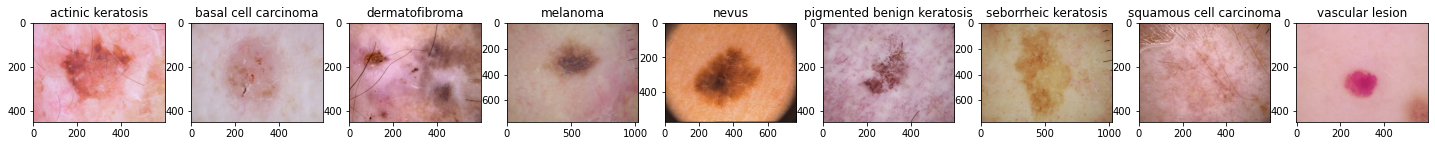

In [ ]:
# Visualising the data of each class. Picking random images from the folder.
fig = plt.figure(figsize=(25,12))
for i in range(len(class_names)):
    img_folder = data_dir_train/class_names[i]
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=plt.imread(image_path)
    ax=plt.subplot(1,9,i+1)
    ax.title.set_text(class_names[i])
    plt.imshow(img)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
# Setting values as per assignment guidance.
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
# Defining the first model architecture. 
model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32,(5, 5), padding='same', activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(9))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Compiling the model with "Adam" optimizer and "categorical cross entropy" loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [ ]:
# Training the model with 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 47s 93ms/step - loss: 2.0997 - accuracy: 0.2193 - val_loss: 1.9130 - val_accuracy: 0.2998
Epoch 2/20
56/56 [==============================] - 2s 35ms/step - loss: 1.8184 - accuracy: 0.3398 - val_loss: 1.7782 - val_accuracy: 0.3602
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.5809 - accuracy: 0.4481 - val_loss: 1.4277 - val_accuracy: 0.5213
Epoch 4/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4309 - accuracy: 0.5022 - val_loss: 1.4471 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.3785 - accuracy: 0.5285 - val_loss: 1.3672 - val_accuracy: 0.5503
Epoch 6/20
56/56 [==============================] - 2s 36ms/step - loss: 1.3111 - accuracy: 0.5441 - val_loss: 1.4038 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.2620 - accuracy: 0.5586 - val_loss: 1.4876 - val_accuracy: 0.5145
Epoch 8/20
5

### Visualizing training results

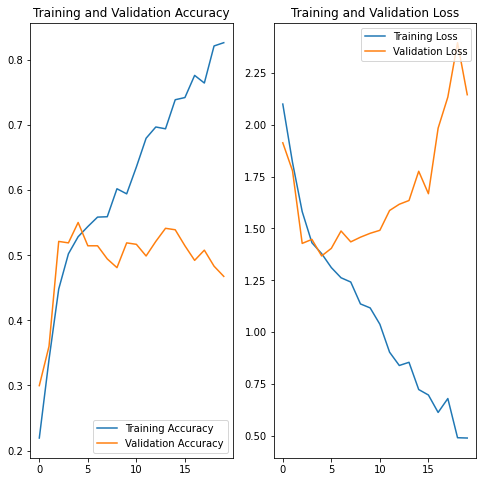

In [ ]:
# Visualizing the model results - As per guidance on the assignment
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### - **Randeep** : Findings from first CNN Model Run
 - After 5 epochs the validation accuracy stopped improving while the training accuracy is improving till 20 epochs. 
 - Clear sign of overfitting.
 - Validation loss reducing trend stopped after 5 epochs and started increasing after 10 epochs

#### **Data Augmentation**: Modify the model with Data Augmentation so that we can reduce the model overfitting.

In [ ]:
# Defining a data augmentation layer with Random Flit & Random Rotation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

/content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000320.jpg


Text(0.5, 1.0, 'Augmented Image')

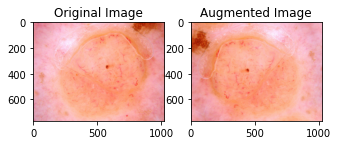

In [ ]:
# Testing the Data Augmentation on a single picture on Class 4.
Todo, visualize how your augmentation strategy works for one instance of training image.
fig = plt.figure(figsize=(8,8))
img_folder= os.path.join(data_dir_train, class_names[4])
print(image_path)
file = random.choice(os.listdir(img_folder))
image_path = os.path.join(img_folder, file)
img1=plt.imread(image_path)
img2=tf.expand_dims(img1, 0)
img3=data_augmentation(img2)
plt.subplot(3, 3, 1)
plt.imshow(img1)
plt.title("Original Image")
plt.subplot(3, 3, 2)
plt.imshow(img3[0])
plt.title("Augmented Image")

### Create the Model again including the data augmentation of Random Flip & Random Rotation, compile and train the model


In [ ]:
## Updated model architecture - Added Dropouts, Random Flip & Random Rotations on the existing data
model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))
model.add(RandomFlip("horizontal_and_vertical"))
model.add(RandomRotation(0.2))
model.add(Conv2D(32,(5, 5), padding='same', activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(9))
model.add(Activation('softmax'))


### Compiling the model

In [ ]:
## Reusing the same optimizer and loss function as the first model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)       

### Training the model

In [ ]:
## Training the model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 47ms/step - loss: 2.3400 - accuracy: 0.1858 - val_loss: 2.0384 - val_accuracy: 0.1655
Epoch 2/20
56/56 [==============================] - 2s 42ms/step - loss: 2.0409 - accuracy: 0.1775 - val_loss: 2.0464 - val_accuracy: 0.2036
Epoch 3/20
56/56 [==============================] - 2s 41ms/step - loss: 2.0257 - accuracy: 0.2037 - val_loss: 2.0382 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 2s 41ms/step - loss: 2.0249 - accuracy: 0.1814 - val_loss: 2.0106 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 2s 41ms/step - loss: 1.9601 - accuracy: 0.2612 - val_loss: 1.8881 - val_accuracy: 0.2998
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.7468 - accuracy: 0.3666 - val_loss: 1.6376 - val_accuracy: 0.4027
Epoch 7/20
56/56 [==============================] - 2s 41ms/step - loss: 1.6592 - accuracy: 0.4023 - val_loss: 1.6030 - val_accuracy: 0.4497
Epoch 8/20
56

### Visualizing the results

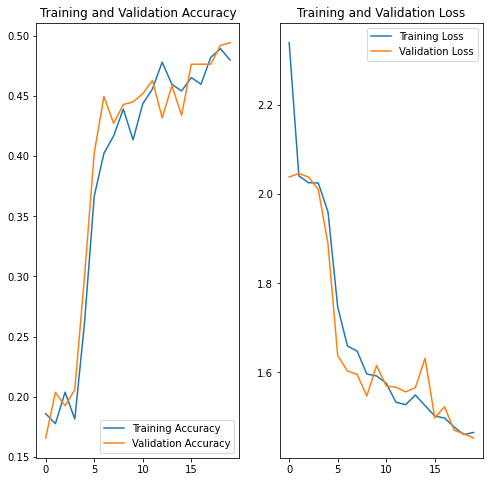

In [ ]:
# Visualizing the results of 2nd model run.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Randeep** : Findings from 2nd Model run.

> Model overfitting as reduced with data augmentation <BR>
> Validation loss has a downward trend. <BR>
> The overall accuracy has reduced or hovering around 50% for both validation & training set. <BR>


#### **Class Imbalance:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Printing the total count of images as well as count of images per class.
total_cnt = len(list(data_dir_train.glob('*/*.jpg')))
print("Total Train Count : ", total_cnt)
for i in range(len(class_names)) :
    img_folder= os.path.join(data_dir_train, class_names[i])
    img_folder = pathlib.Path(img_folder)
    cnt = len(list(img_folder.glob('*.jpg')))
    print(class_names[i], " : ", cnt)

Total Train Count :  2239
actinic keratosis  :  114
basal cell carcinoma  :  376
dermatofibroma  :  95
melanoma  :  438
nevus  :  357
pigmented benign keratosis  :  462
seborrheic keratosis  :  77
squamous cell carcinoma  :  181
vascular lesion  :  139


#### **Randeep:** Findings of class imbalance : 
#### - Which class has the least number of samples?

> *seborrheic keratosis has a count of 77 samples.* <BR>
> *dermatofibroma samples are also less at 95 samples.*

#### - Which classes dominate the data in terms proportionate number of samples?

> *pigmented benign keratosis at count of 462 samples.* <BR>
> *melanoma samples are also high at 438 samples.*

#### **Generate Data:** To Rectify Class Imbalance Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
# Installing Augmentor package
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
# Generating output images from source.
import Augmentor
for i in class_names:
    path_to_training_dataset= os.path.join(data_dir_train, i)
    p = Augmentor.Pipeline(path_to_training_dataset)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF2D0124610>:   1%|          | 3/500 [00:00<00:59,  8.41 Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF18A13F550>: 100%|██████████| 500/500 [00:18<00:00, 26.79 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF19010B850>: 100%|██████████| 500/500 [00:18<00:00, 27.53 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF286315910>: 100%|██████████| 500/500 [00:18<00:00, 26.54 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF2D408B9D0>: 100%|██████████| 500/500 [01:32<00:00,  5.40 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1028x753 at 0x7FF184412BD0>: 100%|██████████| 500/500 [01:19<00:00,  6.33 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF2D02E3110>:   0%|          | 1/500 [00:00<01:10,  7.10 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2981CCF10>: 100%|██████████| 500/500 [00:18<00:00, 26.80 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF2D007F810>: 100%|██████████| 500/500 [00:40<00:00, 12.36 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2D00957D0>: 100%|██████████| 500/500 [00:18<00:00, 27.02 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF2981AC490>:   0%|          | 2/500 [00:00<01:14,  6.68 Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2981E3CD0>: 100%|██████████| 500/500 [00:19<00:00, 26.21 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
# Counting the number of files generated.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026626.jpg_ac2423ea-7bb4-4501-9933-48ab94ff88ab.jpg',
 '/content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029930.jpg_b442517c-eae4-44c0-8978-e5dff189e820.jpg',
 '/content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026457.jpg_1bc7693c-8c27-466a-b256-ae768812aeb3.jpg',
 '/content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032135.jpg_6ed6cfff-7561-4ec2-93ff-b1f03442c5b3.jpg',
 '/content/gdrive/My Drive/Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
# Split of data for each class.
df2['Label'].value_counts()

nevus                         500
seborrheic keratosis          500
basal cell carcinoma          500
vascular lesion               500
squamous cell carcinoma       500
dermatofibroma                500
actinic keratosis             500
melanoma                      500
pigmented benign keratosis    500
Name: Label, dtype: int64

In [ ]:
# New total counts per class
old_cnt = len(list(data_dir_train.glob('*/*.jpg')))
new_cnt = len(list(data_dir_train.glob('*/*/*.jpg')))
total_cnt = old_cnt + new_cnt
print("Total Train Count : ", total_cnt)
for i in range(len(class_names)) :
    img_folder= os.path.join(data_dir_train, class_names[i])
    img_folder = pathlib.Path(img_folder)
    cnt1 = len(list(img_folder.glob('*.jpg')))
    cnt2 = len(list(img_folder.glob('*/*.jpg')))
    cnt = cnt1 + cnt2
    print(class_names[i], " : ", cnt)

Total Train Count :  6739
actinic keratosis  :  614
basal cell carcinoma  :  876
dermatofibroma  :  595
melanoma  :  938
nevus  :  857
pigmented benign keratosis  :  962
seborrheic keratosis  :  577
squamous cell carcinoma  :  681
vascular lesion  :  639


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

 Train the model on the data created using Augmentor

Create a training dataset

In [ ]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed = seed ,
    validation_split= train_val,
    subset = "training",
    interpolation='bilinear'
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


 Create a validation dataset

In [ ]:
val_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed = seed ,
    validation_split= train_val,
    subset = "validation",
    interpolation='bilinear'
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


Creating the 3rd model

In [ ]:
# model architecture
model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))
model.add(RandomFlip("horizontal_and_vertical"))
model.add(RandomRotation(0.2))
model.add(Conv2D(32,(3, 3), padding='same', activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(5024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(9))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## Again compiling the model with Adam optimizer and categorical crossentropy as the loss function.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
random_flip_9 (RandomFlip)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation_8 (RandomRot (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 90, 90, 64)      

#### **Todo:**  Train your model

In [ ]:
## Train your model for 50 epochs
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 40s 228ms/step - loss: 2.4416 - accuracy: 0.2094 - val_loss: 2.0171 - val_accuracy: 0.2465
Epoch 2/50
169/169 [==============================] - 38s 220ms/step - loss: 1.6987 - accuracy: 0.3457 - val_loss: 1.6106 - val_accuracy: 0.3712
Epoch 3/50
169/169 [==============================] - 38s 219ms/step - loss: 1.5565 - accuracy: 0.3891 - val_loss: 1.6461 - val_accuracy: 0.3601
Epoch 4/50
169/169 [==============================] - 39s 224ms/step - loss: 1.4737 - accuracy: 0.4093 - val_loss: 1.5646 - val_accuracy: 0.4031
Epoch 5/50
169/169 [==============================] - 37s 217ms/step - loss: 1.4486 - accuracy: 0.4156 - val_loss: 1.4848 - val_accuracy: 0.4506
Epoch 6/50
169/169 [==============================] - 38s 221ms/step - loss: 1.3952 - accuracy: 0.4475 - val_loss: 1.3588 - val_accuracy: 0.4699
Epoch 7/50
169/169 [==============================] - 38s 223ms/step - loss: 1.3427 - accuracy: 0.4726 - val_loss: 1.3887 - val_ac

Visualize the model results

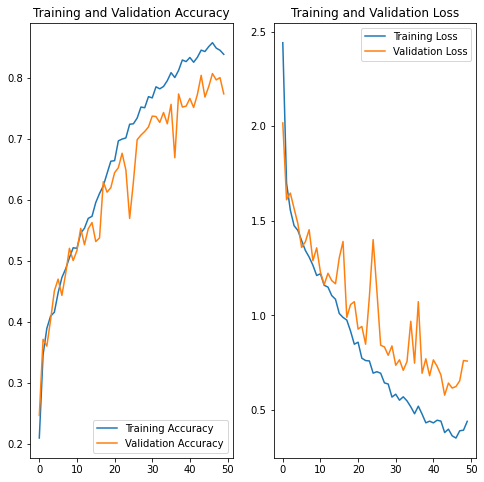

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Randeep :**  


> Generating additional data helped in improving the accuracy. <BR>
> Overfitting is not seen in Model 2 & Model 3. <BR>
> Correcting the class imbalance on training data helped improve the model.

